In [1]:
#from sklearn import datasets
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf 
from tensorflow import keras
#from sklearn.metrics import precision_recall_fscore_support as score
from keras.utils import np_utils
from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
train = pd.read_csv('0505final_train.csv')

In [4]:
train['HOSDAY'] = train['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)
#train = shuffle(train)

In [5]:
train_feature = train.columns[1:]
train_target = train.columns[0]
train_feature = train[train_feature]
train_y = train[train_target]
train_y = train_y.values
train_y = np_utils.to_categorical(train_y, num_classes = 4)

In [6]:
new_all_feature = preprocessing.scale(train_feature)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [8]:
model = Sequential()

In [9]:
model.add( Dense(units=128, input_shape=[52],            #52,47
                 kernel_initializer='he_normal',
                 kernel_regularizer= regularizers.l2(0.1),  #0.04   #0.04   #1層  0.02
#           bias_regularizer = regularizers.l2(0.05),  #0.05
#           activity_regularizer=regularizers.l2(0.0001),                      
                 activation='relu') )

In [10]:
model.add(Dropout(0.4))  #ep 300

In [11]:
model.add( Dense(units=64,
                 kernel_initializer='he_normal',  #he_normal
                 kernel_regularizer= regularizers.l2(0.1),   #0.06
#               bias_regularizer = regularizers.l2(0.05),                
#               activity_regularizer=regularizers.l2(0.001),
                 activation='relu'))   #relu

In [12]:
model.add(Dropout(0.4))  #ep 100    #0.5  #0.3

In [13]:
model.add( Dense(units=4, 
#                kernel_initializer='normal',
                 activation='softmax'))    # kernel_initializer='normal',

In [14]:
model.compile( optimizer = 'adam' , loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
#train_history = model.fit(new_all_feature , train_y, 
#                          validation_split=0.1, 
#                          epochs = 500, batch_size=15,verbose=2)  # 50 ,15  # 100, 15 #500,15  #50,171 #100,171 #500,171

In [16]:
train_history = model.fit(new_all_feature , train_y, 
                          validation_split=0.1, 
                          epochs = 500, batch_size=15,verbose=1)

Train on 171 samples, validate on 20 samples
Epoch 1/500
171/171 [==============================] - 0s 1ms/step - loss: 30.6384 - acc: 0.2164 - val_loss: 28.4453 - val_acc: 0.1500
Epoch 2/500
171/171 [==============================] - 0s 140us/step - loss: 27.3908 - acc: 0.4094 - val_loss: 25.8410 - val_acc: 0.4000
Epoch 3/500
171/171 [==============================] - 0s 134us/step - loss: 24.9440 - acc: 0.4211 - val_loss: 23.4584 - val_acc: 0.5000
Epoch 4/500
171/171 [==============================] - 0s 140us/step - loss: 22.4709 - acc: 0.4912 - val_loss: 21.2996 - val_acc: 0.5000
Epoch 5/500
171/171 [==============================] - 0s 123us/step - loss: 20.3918 - acc: 0.5029 - val_loss: 19.3140 - val_acc: 0.5000
Epoch 6/500
171/171 [==============================] - 0s 146us/step - loss: 18.4373 - acc: 0.5673 - val_loss: 17.5064 - val_acc: 0.5000
Epoch 7/500
171/171 [==============================] - 0s 152us/step - loss: 16.6804 - acc: 0.5614 - val_loss: 15.8681 - val_acc: 0.500

Epoch 61/500
171/171 [==============================] - 0s 116us/step - loss: 1.0421 - acc: 0.6608 - val_loss: 1.3246 - val_acc: 0.5000
Epoch 62/500
171/171 [==============================] - 0s 122us/step - loss: 1.0384 - acc: 0.6608 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 63/500
171/171 [==============================] - 0s 117us/step - loss: 1.0362 - acc: 0.6725 - val_loss: 1.3433 - val_acc: 0.5000
Epoch 64/500
171/171 [==============================] - 0s 105us/step - loss: 1.0375 - acc: 0.6725 - val_loss: 1.3417 - val_acc: 0.5000
Epoch 65/500
171/171 [==============================] - 0s 105us/step - loss: 1.0117 - acc: 0.6725 - val_loss: 1.3667 - val_acc: 0.5000
Epoch 66/500
171/171 [==============================] - 0s 93us/step - loss: 1.0302 - acc: 0.6842 - val_loss: 1.3544 - val_acc: 0.5000
Epoch 67/500
171/171 [==============================] - 0s 117us/step - loss: 1.0514 - acc: 0.6550 - val_loss: 1.3490 - val_acc: 0.5000
Epoch 68/500
171/171 [===========================

171/171 [==============================] - 0s 117us/step - loss: 0.9424 - acc: 0.7427 - val_loss: 1.3646 - val_acc: 0.5500
Epoch 122/500
171/171 [==============================] - 0s 111us/step - loss: 0.9627 - acc: 0.7427 - val_loss: 1.3540 - val_acc: 0.5500
Epoch 123/500
171/171 [==============================] - 0s 111us/step - loss: 0.9895 - acc: 0.6901 - val_loss: 1.3510 - val_acc: 0.5500
Epoch 124/500
171/171 [==============================] - 0s 117us/step - loss: 0.9644 - acc: 0.7251 - val_loss: 1.3764 - val_acc: 0.5500
Epoch 125/500
171/171 [==============================] - 0s 111us/step - loss: 0.9695 - acc: 0.7544 - val_loss: 1.3644 - val_acc: 0.5000
Epoch 126/500
171/171 [==============================] - 0s 111us/step - loss: 0.9448 - acc: 0.7368 - val_loss: 1.3645 - val_acc: 0.5000
Epoch 127/500
171/171 [==============================] - 0s 111us/step - loss: 0.9574 - acc: 0.7193 - val_loss: 1.3547 - val_acc: 0.5000
Epoch 128/500
171/171 [==============================] 

Epoch 181/500
171/171 [==============================] - 0s 117us/step - loss: 0.8863 - acc: 0.8070 - val_loss: 1.4035 - val_acc: 0.5000
Epoch 182/500
171/171 [==============================] - 0s 105us/step - loss: 0.8823 - acc: 0.8070 - val_loss: 1.3604 - val_acc: 0.5500
Epoch 183/500
171/171 [==============================] - 0s 105us/step - loss: 0.9037 - acc: 0.7719 - val_loss: 1.3566 - val_acc: 0.6000
Epoch 184/500
171/171 [==============================] - 0s 116us/step - loss: 0.8848 - acc: 0.7953 - val_loss: 1.4090 - val_acc: 0.5000
Epoch 185/500
171/171 [==============================] - 0s 111us/step - loss: 0.8968 - acc: 0.8070 - val_loss: 1.4097 - val_acc: 0.6000
Epoch 186/500
171/171 [==============================] - 0s 111us/step - loss: 0.9298 - acc: 0.7719 - val_loss: 1.4359 - val_acc: 0.6000
Epoch 187/500
171/171 [==============================] - 0s 111us/step - loss: 0.9148 - acc: 0.8070 - val_loss: 1.4529 - val_acc: 0.5500
Epoch 188/500
171/171 [==================

Epoch 241/500
171/171 [==============================] - 0s 105us/step - loss: 0.8206 - acc: 0.8246 - val_loss: 1.3601 - val_acc: 0.5500
Epoch 242/500
171/171 [==============================] - 0s 116us/step - loss: 0.8415 - acc: 0.8070 - val_loss: 1.3958 - val_acc: 0.6500
Epoch 243/500
171/171 [==============================] - 0s 117us/step - loss: 0.8487 - acc: 0.8246 - val_loss: 1.4270 - val_acc: 0.5500
Epoch 244/500
171/171 [==============================] - 0s 111us/step - loss: 0.8783 - acc: 0.7778 - val_loss: 1.4365 - val_acc: 0.6000
Epoch 245/500
171/171 [==============================] - 0s 117us/step - loss: 0.8437 - acc: 0.8012 - val_loss: 1.4366 - val_acc: 0.6000
Epoch 246/500
171/171 [==============================] - 0s 105us/step - loss: 0.8301 - acc: 0.8129 - val_loss: 1.4230 - val_acc: 0.5500
Epoch 247/500
171/171 [==============================] - 0s 111us/step - loss: 0.8716 - acc: 0.8129 - val_loss: 1.4611 - val_acc: 0.5500
Epoch 248/500
171/171 [==================

Epoch 301/500
171/171 [==============================] - 0s 117us/step - loss: 0.7915 - acc: 0.8246 - val_loss: 1.4249 - val_acc: 0.5500
Epoch 302/500
171/171 [==============================] - 0s 116us/step - loss: 0.7824 - acc: 0.8421 - val_loss: 1.4449 - val_acc: 0.5000
Epoch 303/500
171/171 [==============================] - 0s 111us/step - loss: 0.7890 - acc: 0.8363 - val_loss: 1.4273 - val_acc: 0.6000
Epoch 304/500
171/171 [==============================] - 0s 111us/step - loss: 0.8160 - acc: 0.8187 - val_loss: 1.4230 - val_acc: 0.5500
Epoch 305/500
171/171 [==============================] - 0s 105us/step - loss: 0.7637 - acc: 0.8480 - val_loss: 1.4105 - val_acc: 0.6500
Epoch 306/500
171/171 [==============================] - 0s 117us/step - loss: 0.7719 - acc: 0.8655 - val_loss: 1.4532 - val_acc: 0.5500
Epoch 307/500
171/171 [==============================] - 0s 105us/step - loss: 0.8052 - acc: 0.8187 - val_loss: 1.4452 - val_acc: 0.5000
Epoch 308/500
171/171 [==================

Epoch 361/500
171/171 [==============================] - 0s 105us/step - loss: 0.7464 - acc: 0.8655 - val_loss: 1.4931 - val_acc: 0.6000
Epoch 362/500
171/171 [==============================] - 0s 111us/step - loss: 0.7501 - acc: 0.8480 - val_loss: 1.5341 - val_acc: 0.5500
Epoch 363/500
171/171 [==============================] - 0s 111us/step - loss: 0.7716 - acc: 0.8596 - val_loss: 1.4908 - val_acc: 0.5500
Epoch 364/500
171/171 [==============================] - 0s 117us/step - loss: 0.7686 - acc: 0.8538 - val_loss: 1.4649 - val_acc: 0.5500
Epoch 365/500
171/171 [==============================] - 0s 117us/step - loss: 0.7691 - acc: 0.8480 - val_loss: 1.5418 - val_acc: 0.5000
Epoch 366/500
171/171 [==============================] - 0s 111us/step - loss: 0.7815 - acc: 0.8538 - val_loss: 1.4091 - val_acc: 0.5500
Epoch 367/500
171/171 [==============================] - 0s 117us/step - loss: 0.7728 - acc: 0.8772 - val_loss: 1.4121 - val_acc: 0.5000
Epoch 368/500
171/171 [==================

Epoch 421/500
171/171 [==============================] - 0s 105us/step - loss: 0.6926 - acc: 0.8889 - val_loss: 1.3922 - val_acc: 0.6000
Epoch 422/500
171/171 [==============================] - 0s 105us/step - loss: 0.6981 - acc: 0.8713 - val_loss: 1.5063 - val_acc: 0.5500
Epoch 423/500
171/171 [==============================] - 0s 117us/step - loss: 0.6988 - acc: 0.8655 - val_loss: 1.4599 - val_acc: 0.5500
Epoch 424/500
171/171 [==============================] - 0s 105us/step - loss: 0.6991 - acc: 0.8538 - val_loss: 1.4732 - val_acc: 0.6000
Epoch 425/500
171/171 [==============================] - 0s 117us/step - loss: 0.7047 - acc: 0.9006 - val_loss: 1.5493 - val_acc: 0.5000
Epoch 426/500
171/171 [==============================] - 0s 99us/step - loss: 0.7282 - acc: 0.8304 - val_loss: 1.4741 - val_acc: 0.5500
Epoch 427/500
171/171 [==============================] - 0s 111us/step - loss: 0.6849 - acc: 0.8889 - val_loss: 1.4411 - val_acc: 0.5500
Epoch 428/500
171/171 [===================

Epoch 481/500
171/171 [==============================] - 0s 111us/step - loss: 0.7080 - acc: 0.8596 - val_loss: 1.5386 - val_acc: 0.6000
Epoch 482/500
171/171 [==============================] - 0s 111us/step - loss: 0.6565 - acc: 0.8889 - val_loss: 1.6248 - val_acc: 0.5500
Epoch 483/500
171/171 [==============================] - 0s 111us/step - loss: 0.7384 - acc: 0.8304 - val_loss: 1.5680 - val_acc: 0.5000
Epoch 484/500
171/171 [==============================] - 0s 111us/step - loss: 0.7018 - acc: 0.8655 - val_loss: 1.6470 - val_acc: 0.5500
Epoch 485/500
171/171 [==============================] - 0s 122us/step - loss: 0.6823 - acc: 0.8889 - val_loss: 1.5962 - val_acc: 0.5500
Epoch 486/500
171/171 [==============================] - 0s 111us/step - loss: 0.7342 - acc: 0.8538 - val_loss: 1.6111 - val_acc: 0.5500
Epoch 487/500
171/171 [==============================] - 0s 116us/step - loss: 0.7015 - acc: 0.8713 - val_loss: 1.5349 - val_acc: 0.5500
Epoch 488/500
171/171 [==================

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):  #,validation
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

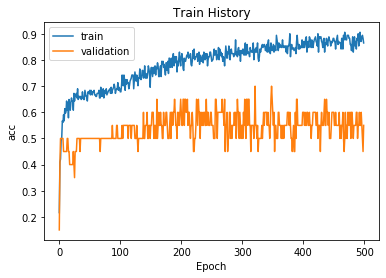

In [18]:
show_train_history(train_history,'acc','val_acc')

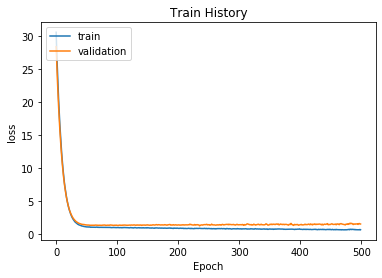

In [19]:
show_train_history(train_history,'loss','val_loss')  #

In [20]:
#test = pd.read_csv('0527test_data_final_real.csv')

In [21]:
test = pd.read_csv('0625test_data_final_real.csv')

In [22]:
test['HOSDAY'] = test['HOSDAY'].map({"A": 0, "B":1, "C":2, "D":3 }).astype(int)

In [23]:
test_feature = test.columns[1:]
test_target = test.columns[0]
test_feature = test[test_feature]
test_y = test[test_target]
test_y = test_y.values
test_y = np_utils.to_categorical(test_y, num_classes = 4)

In [24]:
test_scaledFeatures  = ( ( test_feature - train_feature.mean(axis=0) ) / train_feature.std(axis=0) )

In [25]:
test_out =  model.predict(test_scaledFeatures)

In [26]:
test_out

array([[0.15769991, 0.09501605, 0.55828035, 0.18900372],
       [0.88757473, 0.03500184, 0.03974598, 0.03767744],
       [0.90448654, 0.05797856, 0.01412603, 0.02340887],
       [0.95017976, 0.02155706, 0.01057761, 0.01768554],
       [0.6528543 , 0.03284556, 0.17410354, 0.1401965 ],
       [0.49006802, 0.31509593, 0.11251815, 0.0823179 ],
       [0.43693477, 0.46940768, 0.04571984, 0.04793764],
       [0.904879  , 0.01221841, 0.04076051, 0.04214213],
       [0.8690706 , 0.02426442, 0.05325104, 0.05341396],
       [0.47766045, 0.2815608 , 0.14310116, 0.09767767],
       [0.85352886, 0.01731575, 0.06746979, 0.06168563]], dtype=float32)

In [27]:
test_out_class =  model.predict_classes(test_scaledFeatures)

In [28]:
test_out_class

array([2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [29]:
test['HOSDAY'].values

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [30]:
pd.crosstab( test['HOSDAY'].values, test_out_class, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
0,5,0,0
1,4,1,1


In [31]:
score2 = model.evaluate(test_scaledFeatures, test_y, verbose=2)
score2

[1.5304310321807861, 0.5454545617103577]